In [789]:
from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator
from ta.volatility import BollingerBands
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
from statsmodels.tsa.seasonal import seasonal_decompose


# no keys required for crypto data
client = CryptoHistoricalDataClient()

start_date = dt.date.today() - dt.timedelta(1)
end_date = dt.date.today()
start_date = dt.datetime.combine(start_date, dt.datetime.min.time())


request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD",],
                        timeframe=TimeFrame.Minute,
                        start=start_date
                 )

bars = client.get_crypto_bars(request_params)
bars = bars.df

bars=bars.reset_index(pd.Index(['symbol']))


bars['ema'] = EMAIndicator(bars.close, 20).ema_indicator()
bars['rsi'] = RSIIndicator(bars.close, 14).rsi()
#bars['rsi'] = EMAIndicator(bars.rsi,2).ema_indicator()
bb = BollingerBands(bars.close, 20, 2)
bars['bb_upper'] = bb.bollinger_hband()
bars['bb_lower'] = bb.bollinger_lband()
bars['bb_middle'] = bb.bollinger_mavg()

bars['signal'] = np.where((bars['close'] < bars['ema'])
                         & (bars['close'].shift(1) < bars['close'])
                         &  (bars['close']< bars['bb_lower'])
                         & (bars['rsi'].shift(1) <20)
                          , 1, 0)

bars['signal'] = np.where((bars['close'] > bars['ema'])
                          & (bars['close'].shift(1) > bars['close'])
                          &  (bars['close']< bars['bb_upper'])
                          & (bars['rsi'].shift(1) >80)
                          , -1, bars['signal'])

#bars.fillna(0, inplace=True)

# convert to dataframe
bars

,symbol,open,high,low,close,volume,trade_count,vwap,ema,rsi,bb_upper,bb_lower,bb_middle,signal
timestamp,,,,,,,,,,,,,,
2022-10-15 00:00:00+00:00,BTC/USD,19178.0,19185.0,19177.0,19184.0,0.3506,6.0,19177.819452,NaN,NaN,NaN,NaN,NaN,0
2022-10-15 00:01:00+00:00,BTC/USD,19182.0,19182.0,19182.0,19182.0,0.0569,1.0,19182.000000,NaN,NaN,NaN,NaN,NaN,0
2022-10-15 00:02:00+00:00,BTC/USD,19183.0,19188.0,19183.0,19188.0,0.0545,4.0,19184.856881,NaN,NaN,NaN,NaN,NaN,0
2022-10-15 00:04:00+00:00,BTC/USD,19187.0,19187.0,19187.0,19187.0,0.0001,1.0,19187.000000,NaN,NaN,NaN,NaN,NaN,0
2022-10-15 00:06:00+00:00,BTC/USD,19184.0,19184.0,19184.0,19184.0,0.0045,2.0,19184.000000,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-16 21:51:00+00:00,BTC/USD,19218.0,19219.0,19203.0,19203.0,0.7294,8.0,19204.296408,19266.698121,12.637827,19336.733466,19212.766534,19274.75,0
2022-10-16 21:52:00+00:00,BTC/USD,19200.0,19200.0,19142.0,19142.0,9.9770,45.0,19187.217180,19254.822109,7.792720,19349.483131,19183.516869,19266.50,0
2022-10-16 21:53:00+00:00,BTC/USD,19160.0,19171.0,19148.0,19167.0,2.2465,20.0,19167.111596,19246.458099,21.137105,19350.835645,19168.164355,19259.50,1


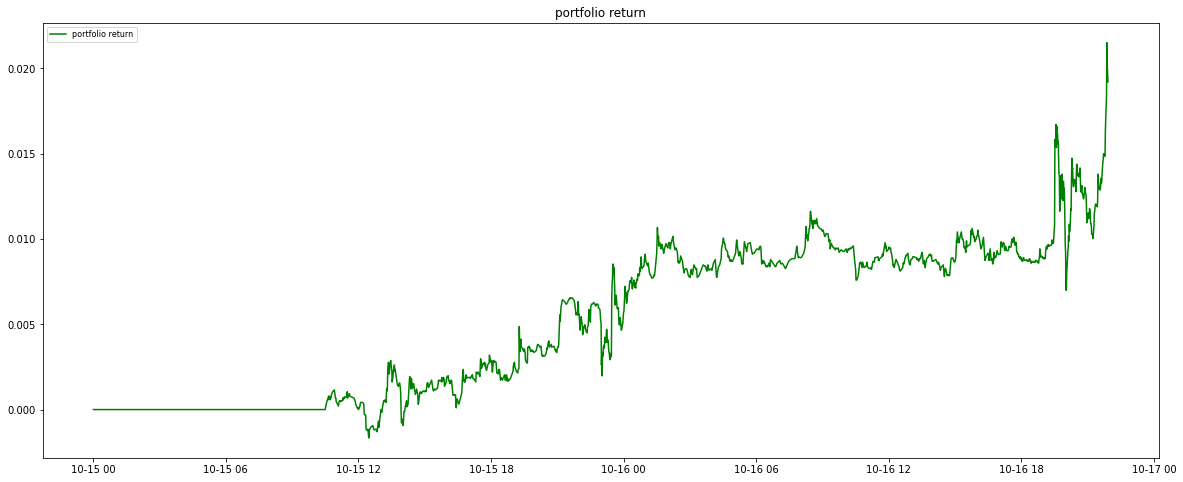

In [790]:
bars['position_1'] = bars['signal'].replace(to_replace=0, method='ffill')

# shifting by 1, to account of close price return calculations
bars['position_1'] = bars['position_1'].shift(1)

 # Calcuulating daily returns
bars["bnh_returns"] = np.log(bars["close"]/bars["close"].shift())

# calculating stretegy returns
bars['strategy_returns'] = bars['bnh_returns'] * (bars['position_1'])

# Cumulative returns fucntion
def get_cumulative_return(df):
    return list(df.cumsum())[-1]

#  Annualized sharpe ratio function
def get_annualized_sharpe_ratio(df):
    return 252**(1/2) * (df.mean() / df.std())

plt.figure(figsize=(20, 8))
plt.subplot(1,1,1)
plt.plot(bars['strategy_returns'].cumsum(), label='portfolio return', color = 'green',)
plt.title(f"portfolio return")
plt.legend(loc='upper left', fontsize=8)
plt.show()


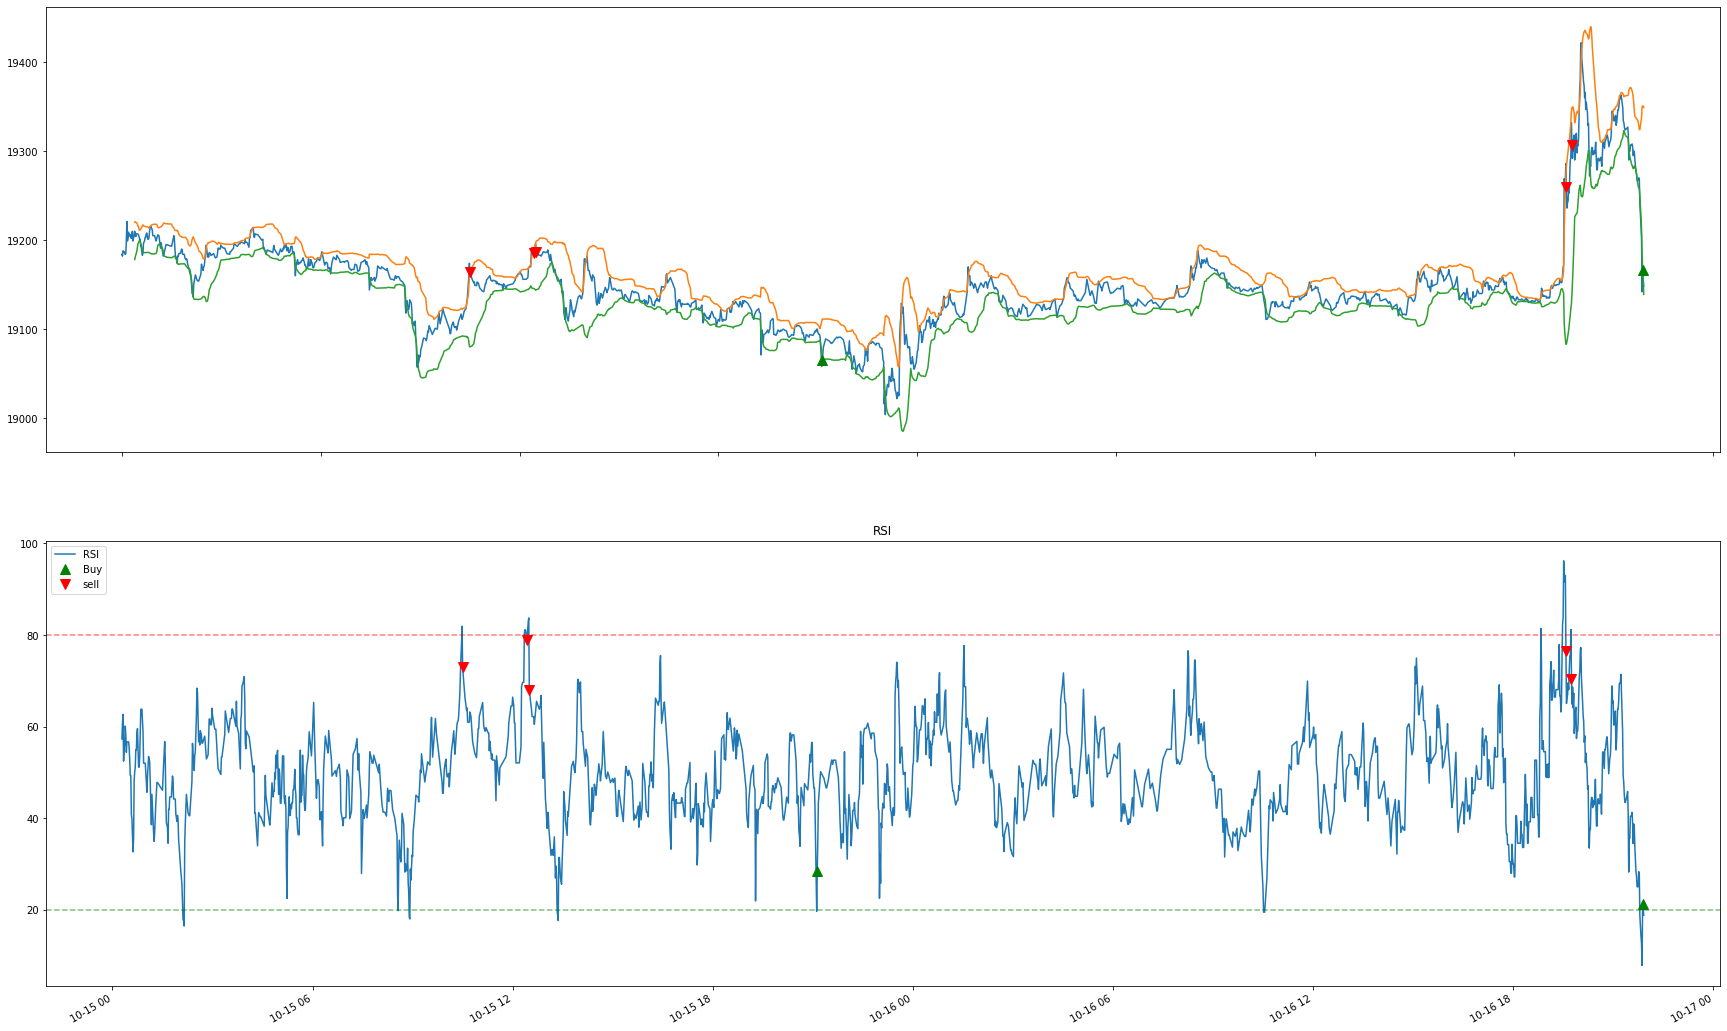

In [791]:
plt.figure(figsize=(30, 20))
plt.subplot(2,1,1)
plt.plot(bars['close'],label="close",linewidth=1.5)
plt.plot(bars.bb_upper, label='EMA')
plt.plot(bars.bb_lower, label='EMA')


# plot the buy points on the close price series
plt.plot(bars.signal.loc[bars.signal == 1].index, bars['close'][bars.signal == 1], '^', markersize=10, color='g', label='Buy')
plt.plot(bars.signal.loc[bars.signal == -1].index, bars['close'][bars.signal == -1], 'v', markersize=10, color='r', label='sell')


plt.gcf().autofmt_xdate()
plt.subplot(2, 1, 2)
plt.plot(bars['rsi'], label='RSI')
plt.axhline(80, linestyle='--', alpha=0.5, color='red')
plt.axhline(20, linestyle='--', alpha=0.5, color='green')
# plot the buy points on the close price series
plt.plot(bars.signal.loc[bars.signal == 1].index, bars['rsi'][bars.signal == 1], '^', markersize=10, color='g', label='Buy')
plt.plot(bars.signal.loc[bars.signal == -1].index, bars['rsi'][bars.signal == -1], 'v', markersize=10, color='r', label='sell')
plt.legend(loc='upper left')
plt.title('RSI')

plt.gcf().autofmt_xdate()

In [792]:
from alpaca.trading import TradingClient

trading_client = TradingClient('PKFZSPYZXB1ZDPPZ1UZU', '7KFPD5JYczbvPstNCtbF4GzVrblxBZc00q06LVPx')
account = trading_client.get_account()
print(account.non_marginable_buying_power)


99908.73


In [793]:
def check_positions(symbol):
    trading_client = TradingClient('PKFZSPYZXB1ZDPPZ1UZU', '7KFPD5JYczbvPstNCtbF4GzVrblxBZc00q06LVPx')

    positions = trading_client.get_all_positions()
    #print(positions)
    for symbols in symbol:
        symbol = symbols.replace('/', '')
        return len([position for position in positions if position.symbol == symbol])

    #for p in positions:
    #    if p.symbol == symbol:
            #return float(p.qty)
            #return len([position for position in positions if position.symbol == symbol])

    #return 0

positions = check_positions(['BTC/USD'])
print(positions)

0


In [794]:
# use 20% of the cash to buy the asset
cash = float(account.non_marginable_buying_power)

cash_to_use = cash * 0.1
# calculate the number of assets to buy
qty = cash_to_use / bars.close.iloc[-1]
qty = round(qty,3)
print(cash_to_use)
print(cash)
print(qty)

9990.873
99908.73
0.522


In [795]:
from alpaca.trading import MarketOrderRequest, OrderSide, TimeInForce
symbol  = 'ETHUSD'
"""order = trading_client.submit_order(
                MarketOrderRequest(
                    symbol=symbol,
                    qty=qty,
                    side=OrderSide.BUY,
                    time_in_force=TimeInForce.GTC,
                )
            )"""
print('Buy order placed for ' + symbol + ' at ' + str(bars.close.iloc[-1]))


Buy order placed for ETHUSD at 19148.0


In [798]:
symbol='BTCUSD'
symbol = symbol.replace('/', '')

# place the order
trading_client.close_position(
        symbol_or_asset_id=symbol
)
print('Sell order placed for ' + symbol + ' at ' + str(bars.close.iloc[-1]))

Sell order placed for BTCUSD at 19148.0
